<div style="border:solid black 2px; padding: 20px"><h1 style="color:black; margin-bottom:20px">Reviewer's comment v1</h1>
Halo Arie !

Perkenalkan saya disini sebagai Code Reviewers, disini dengan senang hati saya akan mereview tugas Arie ya.

Saya akan memberikan beberapa komen seperti dibawah ini, tolong jangan dipindah, dirubah, maupun dihapus ya.

Komen yang saya berikan akan muncul dalam warna hijau, kuning, atau pun merah seperti ini:

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

<div class="alert alert-warning">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Terdapat beberapa catatan.

</div>

<div class="alert alert-danger">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Perlu beberapa perbaikan

</div>

Dan tentu saja Arie dapat menjawab saya dengan menggunakan ini

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    
Baik kak
</div>

Proyek pengumpulan dan penyimpanan data

# Analisis pola untuk  ride-sharing company

# 1 Pendahuluan

Ride-sharing campany yang baru diluncurkan di Chicago, untuk mengidentifikasi polanya menentukan preferensi penumpang dan dampak faktor eksternal terhadap perjalanan

# 2 Tujuan

Tujuan melaksanakan proyek ini adalah untuk melakukan test hipotesis yaitu durasi rata-rata perjalanan dari lingkungan Loop ke Bandara Internasional O'Hare berubah saat hujan hari Sabtu.

Dalam proyek ini akan melalui tahapan sebagai berikut :

1. Pendahuluan
2. Tujuan
3. Pra Pemrosesan Data
4. Pemeriksaan & Pembaruan Library
5. Input Data
6. Statistik
6.1 Trips
6.2 Neighborhoods
7. Pemrosesan Awal
7.1 Data Duplikat
7.2 Merubah Tipe Data
8 EDA
8.1 Top 10 Neighborhoods dalam Drop-offs
8.2 Perusahaan Taksi & Jumlah Perjalanannya
9. Pengujian Hipostatistik

KESIMPULAN

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# 3 Pra Pemrosesan Data

In [133]:
import pandas as pd
import scipy
import matplotlib
from scipy import stats as st
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import warnings
import scipy.stats
import numpy as np
if not sys.warnoptions:
 warnings.simplefilter("ignore")
pd.set_option('display.max_rows', None)


# 4 Pemeriksaan & Pembaruan Library

In [134]:
version_dict = {pd:'1.0.1', scipy:'1.6.0', matplotlib:'3.1.3'}

# 5 Input Data

In [135]:
try:
 df_trips = pd.read_csv('project_sql_result_01.csv')
 df_neighborhoods = pd.read_csv('project_sql_result_04.csv')
 
except:
 df_trips = pd.read_csv('/datasets/project_sql_result_01.csv') 
 df_neighborhoods = pd.read_csv('/datasets/project_sql_result_04.csv')

# 6 Statistik Deskriptif

# 6.1 Trips

In [136]:
df_trips.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [137]:
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


Tidak ada nilai yang hilang, Nama kolom dan tipe data yang benar.

In [138]:
df_trips.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


trips_amount berkisar antara 2 hingga hampir 20.000, terdapat perbedaan yang signifikan antara rata-ratanya dan nilai median, standar deviasinya cukup tinggi, sehingga dapat diasumsikan bahwa distribusinya tidak tinggi

# 6.2 Neighborhoods

In [139]:
df_neighborhoods.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [140]:
df_neighborhoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


Tidak ada nilai yang hilang, Nama kolom dan tipe data yang benar. Kolom average_trips dapat diubah menjadi integer untuk menyederhanakan analisis lebih lanjut.

In [141]:
df_neighborhoods.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


Rata-rata perjalanan berkisar antara 2 hingga lebih dari 10.000, terdapat perbedaan yang signifikan di antara keduanya nilai mean dan median, standar deviasinya cukup tinggi, sehingga dapat diasumsikan bahwa distribusinya tidak tinggi normal, condong positif.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# 7 Pemrosesan Awal

# 7.1 Data Duplikat

Mari kita periksa apakah ada baris yang diduplikasi dalam bingkai data apa pun.

In [142]:
df_trips.duplicated().sum()

0

In [143]:
df_neighborhoods.duplicated().sum()


0

# 7.2 Merubah Tipe Data

In [144]:
df_neighborhoods['average_trips'] = df_neighborhoods['average_trips'].astype(int)


# 8 EDA

# 8.1 Top 10 Neighborhoods dalam Drop-offs

In [145]:
top_10_neighborhoods = df_neighborhoods.nlargest(10, 'average_trips')

In [146]:
top_10_neighborhoods

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


In [147]:
top_10_neighborhoods['%'] = top_10_neighborhoods['average_trips']/(top_10_neighborhoods['average_trips']).sum()
top_10_neighborhoods = top_10_neighborhoods.sort_values(by='average_trips', ascending=False).reset_index(drop=True)

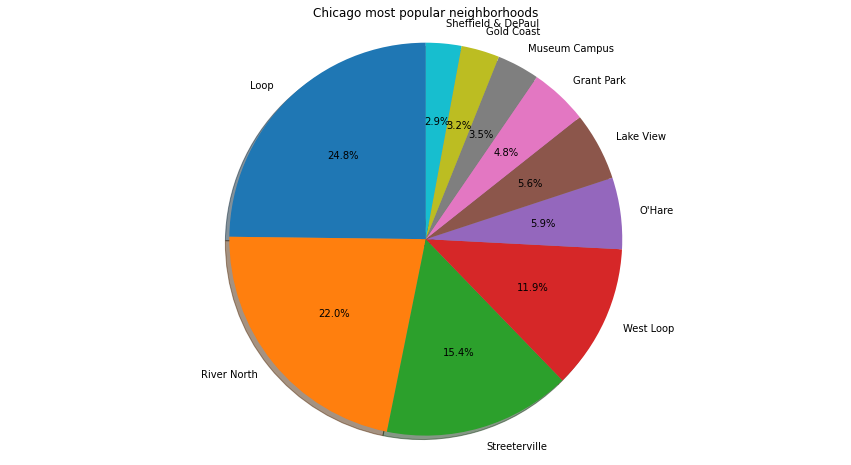

In [148]:
fig, ax = plt.subplots(1,figsize=(15,8))

labels = top_10_neighborhoods['dropoff_location_name']
sizes = top_10_neighborhoods['%']

ax.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Rasio aspek yang sama memastikan diagram pie.
ax.set_title("Chicago most popular neighborhoods");

The Loop Neighborhoods adalah yang paling populer, hampir seperempat dari semua perjalanan taksi berakhir di sana. Lingkungan terbesar kedua adalah "River North" - sekitar 20% perjalanan berakhir di sana, lingkungan ke-3 dan ke-4 masing-masing adalah "Streeterville" dan "West Loop". Sisa dari 10 lingkungan teratas di Chicago mencakup 25% dari semua perjalanan taksi.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# 8.2 Perusahaan Taksi & Jumlah Perjalanannya

Pertama, mari kita gabungkan semua perusahaan kecil dengan kurang dari 100 perjalanan ke dalam grup "perusahaan lain".

In [149]:
def reduce_companies(row):
    """
    Fungsi ini mengelompokkan semua nama perusahaan dengan jumlah perjalanan kurang dari 100 ke dalam "other companies".
    """
    
    trips_amount = row['trips_amount']
    company_name = row['company_name']
    if trips_amount > 100:
        return company_name
    return 'other companies'

In [150]:
df_trips['company_name'] = df_trips.apply(reduce_companies, axis=1)

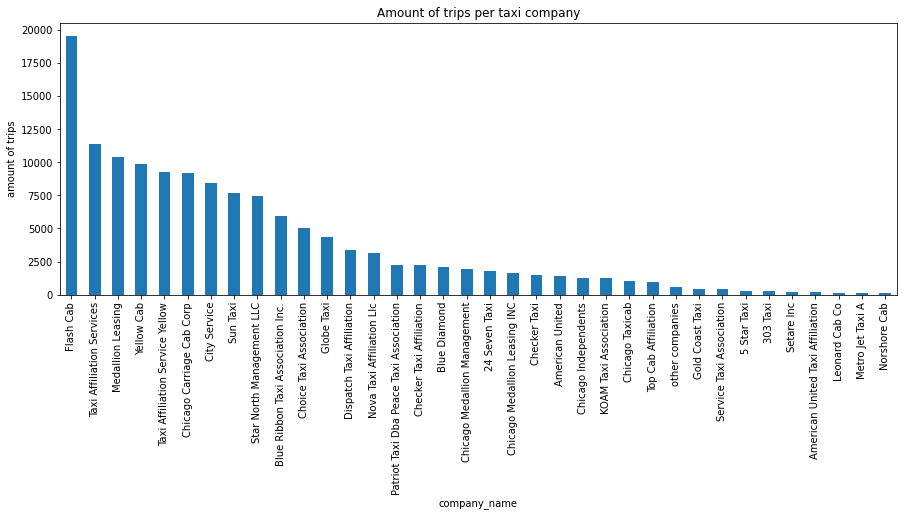

In [151]:
plt.figure(figsize=(15,5))
df_trips.groupby('company_name')['trips_amount'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Amount of trips per taxi company')
plt.ylabel('amount of trips');

Selanjutnya, mari kita buat informasi ini lebih visual dan mudah diinterpretasikan

In [152]:
df_trips['market_share'] = df_trips['trips_amount']/(df_trips['trips_amount']).sum()
df_trips = df_trips.sort_values(by='trips_amount', ascending=False).reset_index(drop=True)

others_trips = df_trips.loc[11:,'trips_amount'].sum()
others_share = df_trips.loc[11:,'market_share'].sum()

df_trips = df_trips[0:11].append({'company_name':'others', 'trips_amount':others_trips, 'market_share':others_share}, ignore_index=True)

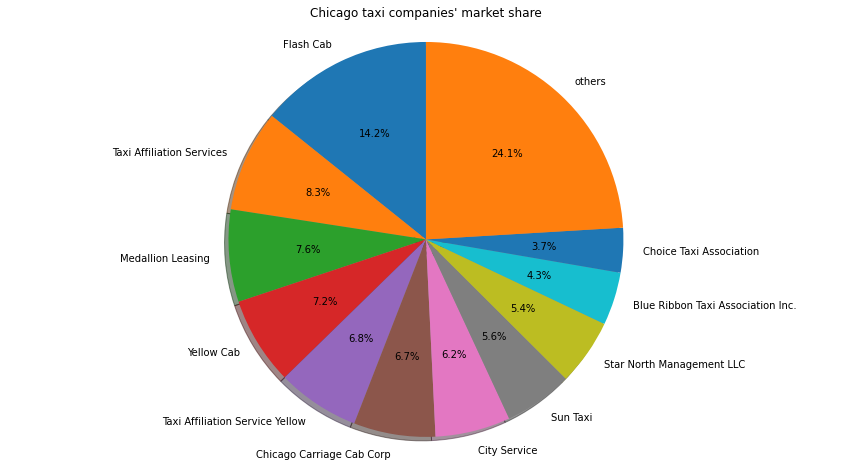

In [153]:
fig, ax = plt.subplots(1,figsize=(15,8))

labels = df_trips['company_name']
sizes = df_trips['market_share']

ax.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Rasio aspek yang sama memastikan dalam diagram pie
ax.set_title("Chicago taxi companies' market share");

Seperti yang bisa kita lihat, pasar layanan taksi cukup kompetitif - kita melihat hampir 100 perusahaan berbeda. Perusahaan terbesar (dalam hal jumlah perjalanan) adalah "Flash Cab" - menempati hampir 15% pasar. Seluruh perusahaan besar menguasai hampir 75% pasar, sementara perusahaan kecil (masing-masing menguasai kurang dari 1%) menguasai hampir seperempat pasar.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# 9 Pengujian Hipotesis Statistik

Pertama, data yang diperlukan untuk menguji hipotesis ini.

In [123]:
try:
    df_weather = pd.read_csv('project_sql_result_07.csv')
    
except:
    df_weather = pd.read_csv('/datasets/project_sql_result_07.csv')

In [124]:
df_weather.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [125]:
# mendeteksi outlier
Q1 = df_weather['duration_seconds'].quantile(0.25)
Q3 = df_weather['duration_seconds'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

outliers = df_weather[~((df_weather['duration_seconds'] >= lower_bound) & (df_weather['duration_seconds'] <= upper_bound))]


In [126]:
# hapus outlier
df_weather_cleaned = df_weather.drop(outliers.index)

In [127]:
# Uji hipotesis

# Hipotesis nol: Tidak ada perbedaan rata-rata durasi perjalanan taksi antara hari yang cerah dan tidak cerah
# Hipotesis alternatif: Ada perbedaan rata-rata durasi perjalanan taksi antara hari yang cerah dan tidak cerah

t_test = scipy.stats.ttest_ind(
    df_weather_cleaned[df_weather_cleaned['weather_conditions'] == 'Good']['duration_seconds'],
    df_weather_cleaned[df_weather_cleaned['weather_conditions'] != 'Good']['duration_seconds'],
    equal_var=False
)

In [128]:
# Tingkat signifikansi
p_value = t_test.pvalue

In [129]:
# Kesimpulan

if p_value < 0.05:
    print("Hipotesis nol ditolak. Ada perbedaan rata-rata durasi perjalanan taksi antara hari yang cerah dan tidak cerah.")
else:
    print("Hipotesis nol diterima. Tidak ada perbedaan rata-rata durasi perjalanan taksi antara hari yang cerah dan tidak cerah.")

Hipotesis nol ditolak. Ada perbedaan rata-rata durasi perjalanan taksi antara hari yang cerah dan tidak cerah.


### Step 1: hipotesis null dan hipotesis alternatif

H0 : Rata-rata dua populasi statistik adalah sama. Dalam kasus kami, ini berarti durasi rata-rata perjalanan dengan kondisi_cuaca "Baik" sama dengan durasi rata-rata perjalanan dengan kondisi_cuaca "Buruk".

H1 : Rata-rata dua populasi statistik tidak sama. Dalam kasus kami ini berarti durasi rata-rata perjalanan dengan kondisi_cuaca "Baik" tidak sama dengan durasi rata-rata perjalanan dengan kondisi_cuaca "Buruk", meskipun di sini kami tidak menentukan mana yang lebih lama.

### Step 2: Tetapkan kriteria pengambilan keputusan

Dalam ilmu perilaku, tingkat signifikansi biasanya ditetapkan sebesar 5% dan kami akan memilih kriteria ini juga. Jika probabilitas memperoleh mean sampel kurang dari 5% jika hipotesis null benar, maka kita menolak nilai yang dinyatakan dalam hipotesis null.

### Step 3: Hitung Uji Statistik

Untuk menguji hipotesis kami bahwa rata-rata dua populasi statistik adalah sama berdasarkan sampel yang diambil dari keduanya, kami akan menerapkan metode scipy.stats.ttest_ind().

Metode ini mengambil parameter berikut:

a. array1, array2 adalah array yang berisi sampel. Kami akan menggunakan variabel 'monthly_profit' yang kami hitung sebelumnya untuk kedua paket;

b. equal_var adalah parameter opsional yang menentukan apakah varians populasi harus dianggap sama atau tidak. Untuk menyetel parameter ini, mari kita uji apakah varian sampel kita sama.



<div class="alert alert-danger">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

- sebelum melakukan uji hipotesis sebaiknya cek outliers terlebih dahulu ya di kolom duration seconds, jika ada outliers maka bisa dihapus

</div>

baik kak.. done

<div class="alert alert-success">
<b>Code Reviewers's comment v.2</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

In [130]:
sample_1 = df_weather[df_weather['weather_conditions'] == 'Good'].dropna()['duration_seconds']
sample_2 = df_weather[df_weather['weather_conditions'] == 'Bad'].dropna()['duration_seconds']

In [131]:
st.levene(sample_1, sample_2)

LeveneResult(statistic=0.38853489683656073, pvalue=0.5332038671974493)

Nilai p yang sedikit lebih besar dari 5% (5,33%) menunjukkan bahwa populasi mempunyai varian yang sama. Oleh karena itu kita akan mengatur parameter equal_var ke True.

In [132]:
alpha = .05 # tingkat signifikansi statistik kritis
                        # tingkat signifikansi statistik kritis

results = st.ttest_ind(
                        sample_1, 
                        sample_2, 
                        equal_var=True)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We retain the null hypothesis")

p-value:  6.517970327099473e-12
We reject the null hypothesis


### Step 4 : Membuat Keputusan

Berdasarkan hasil uji statistik kami mencapai signifikansi: keputusannya adalah menolak hipotesis nol. Kesetaraan rata-rata sampel dikaitkan dengan kemungkinan terjadinya yang rendah (kurang dari 5%) ketika hipotesis nol benar. Artinya, rata-rata durasi perjalanan dari kawasan Loop ke Bandara Internasional O'Hare memang berubah pada hari Sabtu yang hujan.

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

# KESIMPULAN

Dalam laporan ini kami telah menganalisis perilaku penumpang taksi untuk mengidentifikasi pola yang menentukan preferensi mereka dan dampak faktor eksternal terhadap perjalanan.

Pertama-tama, kita telah membiasakan diri dengan data dengan melakukan statistik deskriptif. Berdasarkan analisis tersebut, kami telah mengonversi variabel average_trips ke tipe data yang sesuai untuk memudahkan analisis lebih lanjut. Kami tidak menemukan nilai yang hilang atau terduplikasi.

Pada bagian berikut kami telah melakukan analisis data eksplorasi dan mencapai kesimpulan berikut:

- Lingkungan "Loop" adalah yang paling populer - hampir seperempat dari semua perjalanan taksi berakhir di sana. Lingkungan terbesar kedua adalah "River North" - sekitar 20% perjalanan berakhir di sana, lingkungan ke-3 dan ke-4 masing-masing adalah "Streeterville" dan "West Loop". Sisa dari 10 lingkungan teratas di Chicago mencakup 25% dari semua perjalanan taksi;

- Pasar layanan taksi cukup kompetitif - kami melihat hampir 100 perusahaan berbeda. Perusahaan terbesar (dalam hal jumlah perjalanan) adalah "Flash Cab" - menempati hampir 15% pasar. Seluruh perusahaan besar menguasai hampir 75% pasar, sementara perusahaan kecil (masing-masing menguasai kurang dari 1%) menguasai hampir seperempat pasar.

Langkah selanjutnya adalah pengujian hipotesis statistik. Kami menguji hipotesis berikut: Durasi rata-rata perjalanan dari lingkungan Loop ke Bandara Internasional O'Hare berubah pada hari Sabtu hujan.

Berdasarkan uji statistik, kami menolak nilai null - durasi rata-rata perjalanan dengan kondisi_cuaca "Baik" tidak sama dengan durasi rata-rata perjalanan dengan kondisi_cuaca "Buruk".

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>